In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/PJAIT/ZUM/Twitter_Clustered_Data.csv')

In [4]:
df.head()

,tweet,Cluster
0,guides field apart get competency certificatio...,group_2
1,exactly liberal logic seem forget even rbg sai...,group_1
2,trampled integrity broken fun things never don...,group_1
3,written problems address kenyans english people,group_1
4,see thing president cant add seats supreme cou...,group_1


# ETAP 2: CLASSIC ML

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['Cluster'], test_size=0.4, random_state=42)

# Vectorize the tweets using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)

nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)

nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_vectorized, y_train)
gb_predictions = gb_model.predict(X_test_vectorized)

gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)

# Calculate accuracy for Naive Bayes model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Naive Bayes Accuracy: 0.9293843766166581
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gradient Boosting Classifier Accuracy: 0.8509915502672875
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random Forest Accuracy: 0.922814278323849


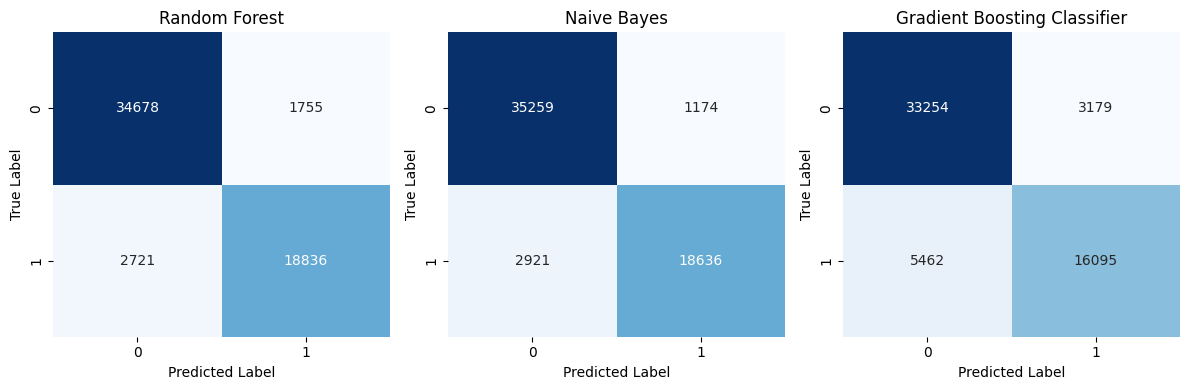

In [6]:
# Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


plt.tight_layout()
plt.show()

# ROC CURVE FOR NAIVE BAYES MODEL

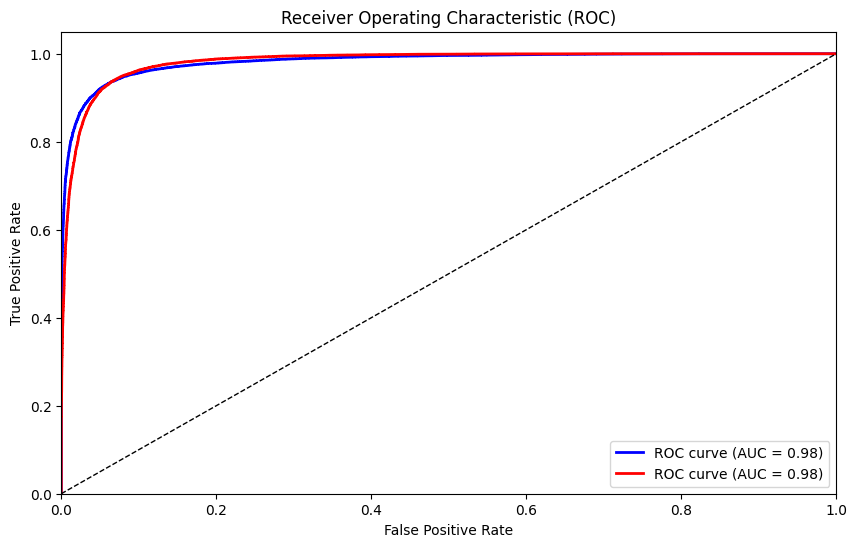

In [7]:
y_pred_prob = nb_model.predict_proba(X_test_vectorized)


# Compute ROC curve and ROC AUC for each class
n_classes = len(nb_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=nb_model.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors as per the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [9]:
texts = [i for i in df["tweet"][1:10].tolist()]

texts_vectorized = vectorizer.transform(texts)
print(gb_model.predict(texts_vectorized))
print(df["Cluster"][1:10].tolist())

['group_1' 'group_1' 'group_1' 'group_1' 'group_2' 'group_2' 'group_2'
 'group_2' 'group_2']
['group_1', 'group_1', 'group_1', 'group_1', 'group_1', 'group_2', 'group_2', 'group_2', 'group_2']


In [10]:
from joblib import dump

dump(nb_model, 'naive_bayes_model.joblib')
dump(rf_model, 'random_forest_model.joblib')
dump(gb_model, 'gradient_boosting_model.joblib')


dump(vectorizer, 'count_vectorizer.joblib')

['count_vectorizer.joblib']